In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

from snsphd import viz
import matplotlib
# rc_2 = {"axes.facecolor": "#ffffff"}
# matplotlib.style.use(rc_2)
import sys
import os
import traceback
# from pydantic import BaseModel

colors, swatches = viz.phd_style(jupyterStyle=True, grid=True)
# %config InlineBackend.figure_formats = ['svg']

# %load_ext autoreload
# %autoreload 2

from dataclasses import dataclass, field

In [2]:
from snsphd.obj import DataObj
from model import Model
from pydantic import BaseModel
from custom_model import FastMinimum, Extremum, Integrate, SetPower

from typing import List, Union, Optional

import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

In [4]:
class Data(BaseModel):
    channel_A: int
    channel_B: int
    extremum: Extremum
    high_power_data: Integrate
    low_power_data: Integrate
    high_power_power: SetPower
    low_power_power: SetPower

def create_data_from_file(path):
    with open(path, "r") as file:
        data = json.load(file)

    file_model = FastMinimum(**data)
    data = Data(extremum=file_model.results[4], 
                channel_A = file_model.results[0].Channel_Request,
                channel_B = file_model.results[1].Channel_Request,
                high_power_data=file_model.results[7], 
                low_power_data=file_model.results[10],
                high_power_power=file_model.results[5],
                low_power_power=file_model.results[8])
    return data

thing = create_data_from_file("../data/8ch_Feb24th/4.0A_36_56.json")
# print(thing.extremum)
# print(thing.channel_B)


In [9]:
# build data object for x8 data

@dataclass
class CHB:
    _52: Data
    _53: Data
    _54: Data
    _55: Data
    _56: Data
    _57: Data
    _58: Data
    _59: Data

    
@dataclass
class CHA:
    _35: CHB
    _36: CHB
    _37: CHB
    _38: CHB
    _39: CHB
    _40: CHB
    _41: CHB
    _42: CHB


data_set = {}
chA_list = [35,36,37,38,39,40,41,42]
chB_list = [52,53,54,55,56,57,58,59]
chB_list.reverse()
object_a_set = {}
for chA in chA_list:
    data_set[chA] = {}
    path = "../data/8ch_Feb24th/"
    object_b_set = {}

    key_A = f"_{chA}"
    for chB in chB_list:

        file_path = os.path.join(path, f"4.0A_{chA}_{chB}.json")
        key_B = f"_{chB}"
        try:
            data = create_data_from_file(file_path)
            object_b_set[key_B] = data
            
        except FileNotFoundError:
            object_b_set[key_B] = None
            
    channel_B = CHB(**object_b_set)
    object_a_set[key_A] = channel_B
    
full = CHA(**object_a_set)

In [10]:
# test I got the indexing correct
print(full._39._56.channel_A)
print(full._39._56.channel_B)

39
56


In [12]:
@dataclass
class CHB_16:
    data: List[Union[Data, None]]

    

    
    channels: List[int] = field(default_factory=lambda: [67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52])
    wl: List[str] = field(default_factory=lambda:['1535.82 nm',
                    '1535.04 nm',
                    '1534.25 nm',
                    '1533.47 nm',
                    '1532.68 nm',
                    '1531.90 nm',
                    '1531.12 nm',
                    '1530.33 nm',
                    '1529.55 nm',
                    '1528.77 nm',
                    '1527.99 nm',
                    '1527.22 nm',
                    '1526.44 nm',
                    '1525.66 nm',
                    '1524.89 nm',
                    '1524.11 nm'])

@dataclass
class CHA_16:
    data: List[CHB_16]
    channels: List[int] = field(default_factory=lambda: [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
    wl: List[str] = field(default_factory=lambda: ['1555.75 nm',
                    '1554.94 nm',
                    '1554.13 nm',
                    '1553.33 nm',
                    '1552.52 nm',
                    '1551.72 nm',
                    '1550.92 nm',
                    '1550.12 nm',
                    '1549.32 nm',
                    '1548.51 nm',
                    '1547.72 nm',
                    '1546.92 nm',
                    '1546.12 nm',
                    '1545.32 nm',
                    '1544.53 nm',
                    '1543.73 nm'])



chA_list_16 = [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
chB_list_16 = [52, 53,54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
chB_list_16.reverse()
# chA_list_16.reverse()

object_a_set = []
for chA in chA_list_16:
    path = "../data/16ch_Feb24th/"
    object_b_set = []

    for chB in chB_list_16:

        file_path = os.path.join(path, f"4.0A_{chA}_{chB}.json")
        try:
            data = create_data_from_file(file_path)
            object_b_set.append(data)
            
        except FileNotFoundError:
            object_b_set.append(None)
        # print(data)
            
    channel_B = CHB_16(data = object_b_set)
    object_a_set.append(channel_B)
    
full_16ch = CHA_16(data=object_a_set)

In [13]:
# test I got the indexing correct >>>>>>>
i = 8
j = 8
print(f"channels parsed: {full_16ch.channels[i]} and {full_16ch.data[i].channels[j]}")
print(f"true channels: {full_16ch.data[i].data[j].channel_A} and {full_16ch.data[i].data[j].channel_B}")
# full_16ch.data[3].data[3].channel_A"

channels parsed: 35 and 59
true channels: 35 and 59


## Experimenting with Pydantic Schemas
- Mostly not worth the effort for this level of complexity
- Type validation really isn't necessary in a lot of use cases.
- Don't define dataclass or pydantic models with fields such as "_52" or "_42". Those types of fields will probably be traversed programmatically anyways, so there's no reason to upscale from a dict to a dataclass. 
- Schemas get really complicated. Unnecessarily complicated for the task at hand, which just needs to pull some simple data out. 

In [15]:
######### creat 8 ch 2d and 1d arrays >>>>>>>

coinc_set = np.zeros((8,8), dtype=float)
coinc_set_full = np.zeros((8,8), dtype=float)
singles_B_rate = []
singles_A_rate = [[],[],[],[],[],[],[],[]]

CHB_ids: Optional[List[str]] = ['_59', '_58', '_57', '_56', '_55', '_54', '_53', '_52']
CHA_ids: Optional[List[str]] = ['_42', '_41', '_40', '_39', '_38', '_37', '_36', '_35']
CHA_ids.reverse()

coincidence_scaling_ratio = 16/6 # 16/6

for i, idA in enumerate(CHA_ids):
    singles_B = []
    for j, idB in enumerate(CHB_ids):
        try:
            high_power_data: Integrate = full.__dict__[idA].__dict__[idB].high_power_data
            coinc = (high_power_data.coincidence_rate*coincidence_scaling_ratio)/1000
            # print(high_power_data.__dict__)
            singles_B.append(high_power_data.singles_rate_1)
            singles_A_rate[j].append(high_power_data.singles_rate_2)


            # you can tell from the printout that the sub-lists are all about the same value. 
            # Therefore it makes sense that they are the same count rate source, and it's appropriate to average them
            # print(singles_A_rate)
            coinc_set[i,j] = round(coinc,1)
            coinc_set_full[i,j] = coinc
        except:
            pass
    # print()
    singles_B_rate.append(np.average(singles_B))


for i in range(8):
    singles_A_rate[i] = np.average(singles_A_rate[i])

print(singles_B_rate) # 52 through 59
print(singles_A_rate) # 35 through 42


[1032701.1239956581, 1039981.4620841458, 953713.4685710326, 1029696.6640426054, 876244.6744804699, 1009865.827556585, 796651.4454410396, 901759.5120014172]
[947506.7816395424, 908605.8280293313, 955672.4284163775, 964518.4651839625, 1052340.7908836026, 1154154.358310535, 1077514.36087079, 1220875.0835455125]


In [16]:
######### creat 16 ch 2d and 1d arrays >>>>>>>

coinc_set_16 = np.zeros((16,16), dtype=float)
coinc_set_full_16 = np.zeros((16,16), dtype=float)
singles_B_rate_16 = []
singles_A_rate_16 = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(len(chA_list_16)):
    singles_B = []
    for j in range(len(chB_list_16)):
        try:
            high_power_data: Integrate = full_16ch.data[i].data[j].high_power_data
            coinc = (high_power_data.coincidence_rate/6)*16/1000
            # print(high_power_data.__dict__)
            singles_B.append(high_power_data.singles_rate_1)
            singles_A_rate_16[j].append(high_power_data.singles_rate_2)


            # you can tell from the printout that the sub-lists are all about the same value. 
            # Therefore it makes sense that they are the same count rate source, and it's appropriate to average them
            # print(singles_A_rate_16)
            coinc_set_16[i,j] = round(coinc,1)
            coinc_set_full_16[i,j] = coinc
        except AttributeError:
            pass
    # print()
    singles_B_rate_16.append(np.average(singles_B))


for i in range(len(singles_A_rate_16)):
    singles_A_rate_16[i] = np.average(singles_A_rate_16[i])

print(singles_B_rate_16) # 52 through 59
print(singles_A_rate_16) # 35 through 42


[1270555.61117707, 1223149.5211598724, 1170703.7877336037, 1168038.8943017328, 1090818.4375911579, 1078475.9133022903, 1079158.6320106601, 1085992.2286876985, 1035870.7516949648, 1029479.7355040058, 942137.001837261, 1008891.9716968046, 842478.0723944703, 971596.9507401657, 752200.4247707151, 845612.0635862056]
[241152.37973387158, 254304.3368469355, 263183.6879084396, 270613.642313564, 275809.4935738846, 292591.8347254565, 301521.424208677, 306158.735931023, 307493.75010859297, 310376.40238145366, 317687.74564465333, 327509.18030055356, 329661.6072787363, 333654.52802773827, 336993.8216822777, 341635.639688841]


In [17]:

def create_custom_cmap():
    # c = ['#003c77', '#004bb6', '#325bd4', '#af64ea', '#f679bc', '#ff928c', '#ffd8ab', '#fff4b1'] #['#002e3b', 
    c = ['#001921', '#00295f', '#003ba2', '#224ec1', '#a156dc', '#e76cb3', '#ff8a85', '#ffd9aa', '#fff4b1']
    c_desat = ['#103c9f', '#9054ca', '#df72a0', '#f5d6ab']
    cmap_name = "AndrewCustsom"
    cmap = LinearSegmentedColormap.from_list(cmap_name, c_desat, N=255)
    return cmap

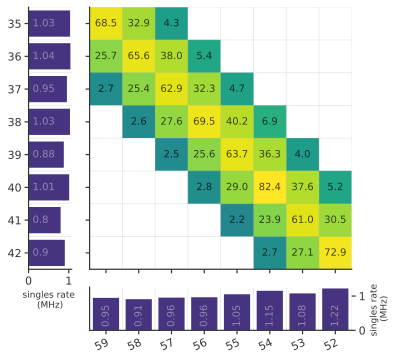

In [18]:
# x8 graph by itself >>>>>>>
viz.update_colors(dark=False)

# cmap = create_custom_cmap()
cmap = matplotlib.cm.viridis

channel_labels_B = [st[1:] for st in CHB_ids]
channel_labels_A = [st[1:] for st in CHA_ids]

fig = plt.figure(figsize = (5,5))

b1 = 0.05
b2 = 0.05
tw = 0.12
width = 1 - 2*b1 - b2 - tw

main_size = [b1 + b2 + tw, b1 + b2 + tw, width, width]
left_bar = [b1, b1 + tw + b2, tw, width]
bottom_bar = [b1 + tw + b2, b1, width, tw]

singles_A_rate = np.array(singles_A_rate)
singles_B_rate = np.array(singles_B_rate)


ax_left_bar = fig.add_axes(left_bar)
ax_bottom_bar = fig.add_axes(bottom_bar)

ax_main = fig.add_axes(main_size, sharex=ax_bottom_bar, sharey=ax_left_bar)
ax_main.tick_params('x', labelbottom=False)
ax_main.tick_params('y', labelleft=False)


ax_left_bar.set_yticks(np.arange(len(chA_list)))
ax_bottom_bar.set_xticks(np.arange(len(chB_list)))

ax_left_bar.set_yticklabels(channel_labels_A)
ax_bottom_bar.set_xticklabels(channel_labels_B)
plt.setp(ax_bottom_bar.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")

ax_left_bar.barh(np.arange(len(singles_B_rate)), singles_B_rate/1e6, color=cmap(0.15))
ax_bottom_bar.bar(np.arange(len(singles_A_rate)), singles_A_rate/1e6, color=cmap(0.15))
ax_bottom_bar.yaxis.tick_right()

ax_left_bar.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax_left_bar.set_xlabel("singles rate \n(MHz)", size=9)

ax_bottom_bar.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax_bottom_bar.set_ylabel("singles rate \n(MHz)", size=9)
ax_bottom_bar.yaxis.set_label_position("right")


ax_main.imshow(coinc_set_full,norm=colors.LogNorm(vmin=.1, vmax=np.max(coinc_set_full)), cmap=cmap)

# move grid lines to edges, instead of center
ax_main.set_yticks(np.arange(-.5, -.5 + 9, 1), minor=True)
ax_main.set_xticks(np.arange(-.5, -.5 + 9, 1), minor=True)
ax_main.grid(False)
ax_main.grid(which='minor')

ax_left_bar.set_xticks([1], minor=True)
ax_left_bar.grid(False)
ax_left_bar.grid(which='minor')
ax_bottom_bar.set_xticks(np.arange(-.5, -.5 + 9, 1), minor=True)
ax_bottom_bar.grid(False)
ax_bottom_bar.grid(which='minor')

for i in range(len(singles_B_rate)):
    ax_left_bar.text(0.1, i, round(singles_B_rate[i]/1e6,2), {'ha': 'left', 'va': 'center'}, color='white', alpha=0.4)
    ax_bottom_bar.text(i, 0.1, round(singles_A_rate[i]/1e6,2), {'ha': 'center', 'va': 'bottom'}, rotation=90, color='white', alpha=0.4)

for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if coinc_set[i][j] == 0:
            # label = '∅'
            label = ''
        else:
            label = coinc_set[i][j]
        text = ax_main.text(j, i, label,
                       ha="center", va="center", 
                       color="black", alpha=0.7)
        



In [19]:
# making sure the singles count rates make sense >>>>>>>
print(full._42._52.high_power_data.singles_rate_2)
print(full._41._52.high_power_data.singles_rate_2)
print(full._40._52.high_power_data.singles_rate_2)
print()
print(full._42._53.high_power_data.singles_rate_2)
print(full._41._53.high_power_data.singles_rate_2)
print(full._40._53.high_power_data.singles_rate_2)
print()
print(full._42._54.high_power_data.singles_rate_2)
print(full._41._54.high_power_data.singles_rate_2)
print(full._40._54.high_power_data.singles_rate_2)
print()
print()
print()
print(full._42._52.high_power_data.singles_rate_1)
print(full._42._53.high_power_data.singles_rate_1)
print(full._42._54.high_power_data.singles_rate_1)
print()
print(full._41._52.high_power_data.singles_rate_1)
print(full._41._53.high_power_data.singles_rate_1)
print(full._41._54.high_power_data.singles_rate_1)

1223607.0611758658
1221319.805716154
1217698.383744518

1067992.576008553
1083231.265160407
1081364.165215062

1157692.9815882093
1159644.9711765295
1173535.9962175908



888606.058459033
890339.9856926398
926332.4918525788

765310.6369332224
821557.1085807317
808407.5157687829


In [20]:
# save x8 data into simple structure for use in schmidt decomp >>>>>>>

chA_list_str = ['35: 1549.32 nm',
               '36: 1548.51 nm',
               '37: 1547.72 nm',
               '38: 1546.92 nm',
               '39: 1546.12 nm',
               '40: 1545.32 nm',
               '41: 1544.53 nm',
               '42: 1543.73 nm']
chB_list_str = ['52: 1535.82 nm',
                '53: 1535.04 nm',
                '54: 1534.25 nm',
                '55: 1533.47 nm',
                '56: 1532.68 nm',
                '57: 1531.90 nm',
                '58: 1531.12 nm',
                '59: 1530.33 nm']

wl_A = [float(st[4:-3]) for st in chA_list_str]
wl_B = [float(st[4:-3]) for st in chB_list_str]
d = {"coinc_set": coinc_set_full.tolist(), 
    "singles_A_rate": singles_A_rate.tolist(), 
    "singles_B_rate": singles_B_rate.tolist(), 
    "wl_A": wl_A, 
    "wl_B": wl_B}


with open("simplified_jsi_data_x8.json", "w") as outfile:
    json.dump(d, outfile)

In [21]:
# save x16 data into simple structure for use in schmidt decomp >>>>>>>
d = {"coinc_set": coinc_set_full_16.tolist(), 
    "singles_A_rate": singles_A_rate_16, 
    "singles_B_rate": singles_B_rate_16, 
    "channels_A": full_16ch.channels, 
    "channels_B": full_16ch.data[0].channels, 
    "wl_A": full_16ch.wl, 
    "wl_B": full_16ch.data[0].wl}

with open("simplified_jsi_data_x16.json", "w") as outfile:
    json.dump(d, outfile)

In [22]:
# identify_axes used for labeling figures >>>>>>>>

import matplotlib.pyplot as plt
import numpy as np


# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

In [23]:
# x8 and x16 diagonal data:

x8_diagonal = []
for i in range(7, -1, -1):
    x8_diagonal.append(float(coinc_set_full[i,i]))

x16_diagonal = []
for i in range(16):
    x16_diagonal.append(float(coinc_set_full_16[i,i]))

print(x8_diagonal)
print(x16_diagonal)

common_ratio = np.array(x8_diagonal)/np.array(x16_diagonal[:8])
multiplier_std = np.std(common_ratio)
multiplier = np.average(common_ratio)
print(multiplier)

[72.9122759759986, 61.042955396823416, 82.36173635326507, 63.689929076861965, 69.48834088704429, 62.87730612766437, 65.60157078404711, 68.49316822143099]
[19.76002601181881, 21.290423855014403, 21.81769651249416, 21.27675075006581, 20.85581004256328, 22.66114612136843, 23.07621178434283, 22.779843731078746, 21.85000627914137, 21.65462910675126, 20.459958202405268, 22.821263942392925, 19.305097576221936, 22.14283968744554, 17.43101063945328, 19.978568270007226]
3.1601914918171365


In [24]:
import orjson
from custom_model_dm import DensityMatrixData, Extremum, SimpleSet

def load_dm_json(path):
    with open(path, "rb") as file:
        json_data = file.read()
    data = orjson.loads(json_data)
    return data

def print_measurment_names_and_idx(data: DensityMatrixData):
    for i, item in enumerate(data.results):
        if item.label:
            if item.label != "default_label":
                print(f"{i}: {item.label}, {item.name}")

class DMData(BaseModel):
    min_scan_1: Extremum
    min_integrate_low_power: Extremum
    min_integrate_high_power: Extremum
    min_scan_2: Extremum
    min_defined_max_integration_low_power: SimpleSet
    min_defined_max_integration_high_power: SimpleSet
    degree_90_integration_low_power: SimpleSet
    degree_90_integration_high_power: SimpleSet
    grad_defined_max_integration_low_power: Extremum
    grad_defined_max_integration_high_power: Extremum

def create_dm_data(model):
    filler_dict = {}
    for i, item in enumerate(model.results):
        if item.label:
            if item.label != "default_label":
                # print(f"{i}: {item.label}, {item.name}")
                key = item.label.replace("-", "_").replace(" ", "_")
                if key == "90_degree_integration_low_power":
                    key = "degree_90_integration_low_power"
                if key == "90_degree_integration_high_power":
                    key = "degree_90_integration_high_power"
                filler_dict[key] = item
            
    return DMData(**filler_dict)
    

data_dict = load_dm_json("../data/jsi_for_hist/channel_visibility_dm_35_59.json")
data_model = DensityMatrixData(**data_dict)
print_measurment_names_and_idx(data_model)
dm_data_model = create_dm_data(data_model)


3: min scan 1, Extremum
6: min integrate low power, Extremum
9: min integrate high power, Extremum
13: min scan 2, Extremum
18: min-defined max integration low power, SimpleSet
21: min-defined max integration high power, SimpleSet
25: 90 degree integration low power, SimpleSet
28: 90 degree integration high power, SimpleSet
35: grad-defined max integration low power, Extremum
38: grad-defined max integration high power, Extremum


In [25]:
type(data_model.results)

list

(243,)


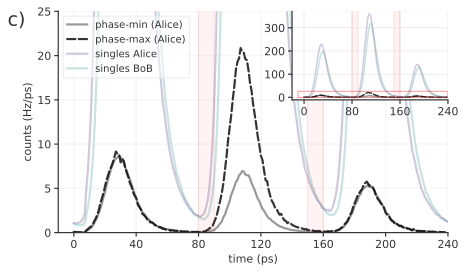

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
viz.update_colors(dark=False)

def fill_hist_plot(ax, dm_data_model):
    def fill_plot(ax, hist_phase_min_rate, hist_phase_max_rate, singles_A_rate, singles_B_rate, lw):

        rlp = 8

        ax.plot(bins[:-1], np.roll(hist_phase_min_rate,rlp), color='grey', ls='-', alpha=0.8, lw=lw, label="phase-min (Alice)", zorder=0)
        ax.plot(bins[:-1], np.roll(hist_phase_max_rate, rlp), color='black', ls='--', alpha=0.8, lw=lw, label="phase-max (Alice)", zorder=0)

        rl = 8
        ax.plot(np.arange(243), np.roll(singles_A_rate,rl), color=cmap(0.1), alpha=0.25, lw=lw, label="singles Alice", zorder=0)
        ax.plot(np.arange(243), np.roll(singles_B_rate,rl), color=cmap(0.5), alpha=0.25, lw=lw, label="singles BoB", zorder=0)

        return ax
    
    def reject_bars(ax):
        ax.axvspan(80, 90, color='red', alpha=0.05, zorder=0)
        ax.axvline(80, color='red', alpha=0.15, lw=0.7)
        ax.axvline(90, color='red', alpha=0.15, lw=0.7)

        ax.axvspan(150, 160, color='red', alpha=0.05, zorder=0)
        ax.axvline(150, color='red', alpha=0.15, lw=0.7)
        ax.axvline(160, color='red', alpha=0.15, lw=0.7)

    total_arrays = []
    total_time = 0
    for obj in dm_data_model.min_defined_max_integration_low_power.results:
        array = obj.full_coinc_1
        total_arrays.append(array)
        total_time += obj.delta_time


    tags_phase_max = np.concatenate(total_arrays)


    # dm_data_model.min_integrate_low_power.integration_results[3].singles_hist_1

    tags_phase_min = dm_data_model.min_integrate_low_power.integration_results[3].full_coinc_1
    # tags_phase_max = dm_data_model.min_defined_max_integration_low_power.results[3].full_coinc_1

    delta_time_phase_max = dm_data_model.min_defined_max_integration_low_power.results[3].delta_time
    delta_time_phase_min = dm_data_model.min_integrate_low_power.integration_results[3].delta_time

    max = 80*3
    min = 0

    hist_phase_min, bins = np.histogram(tags_phase_min, bins=np.arange(max))

    hist_phase_max, bins = np.histogram(tags_phase_max, bins=bins)


    hist_phase_min_rate = hist_phase_min/delta_time_phase_min
    hist_phase_max_rate = hist_phase_max/total_time
    singles_A_rate = dm_data_model.min_integrate_low_power.integration_results[3].singles_hist_1/delta_time_phase_min
    singles_B_rate = dm_data_model.min_integrate_low_power.integration_results[3].singles_hist_2/delta_time_phase_min


    

    fill_plot(ax, hist_phase_min_rate, hist_phase_max_rate, singles_A_rate, singles_B_rate, 2.2)
    print(np.shape(dm_data_model.min_integrate_low_power.integration_results[3].singles_hist_1))


    ax.grid(linewidth=1.6, alpha=0.1)
    ax.set_ylim(0,25)
    ax.set_xlim(-10,240)

    xticks = [0, 40, 80, 120, 160, 200, 240]
    ax.set_xticks(xticks)

    

    legend = ax.legend(loc='upper left', frameon=True, framealpha=0.5, edgecolor='#e6e6e6', fontsize=10)
    legend.get_frame().set_linewidth(1.6)

    ax.set_xlabel("time (ps)", fontsize=11)
    ax.set_ylabel("counts (Hz/ps)", fontsize=11)

    small_ax = inset_axes(ax, width="40%", height="40%", loc=1, borderpad=0)
    rect = Rectangle((-10, 0), 250, 26, linewidth=1, edgecolor='r', facecolor='none', alpha=0.4)
    small_ax.add_patch(rect)


    small_ax.set_xticks([0,80,160,240])
    fill_plot(small_ax, hist_phase_min_rate, hist_phase_max_rate, singles_A_rate, singles_B_rate, 1.5)
    

    reject_bars(ax)
    reject_bars(small_ax)

    # small_ax.spines['right'].set_visible(True)
    # small_ax.spines['left'].set_visible(False)
    # small_ax.spines['top'].set_visible(True)
    small_ax.set_xlim(-20,240)
    small_ax.set_xlim(-20,240)

    ax.text(-.13, 1.00, "c)", transform=ax.transAxes, fontsize=19, va='top')
    

fig, ax = plt.subplots(1,1, figsize=(7,4))
fill_hist_plot(ax, dm_data_model)

In [20]:
dm_data_model.min_integrate_low_power.integration_results[3].full_coinc_1.shape

(372455,)

summed extrapolated counts:  1094.8171019184383
(243,)


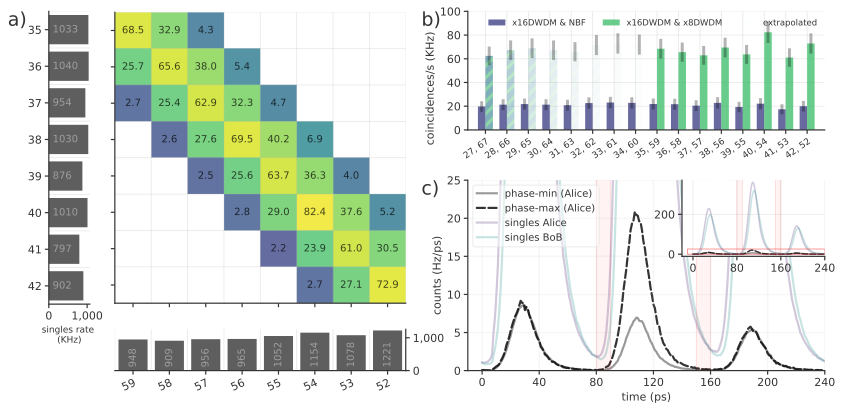

In [21]:
from mpl_layout import bisect

channel_labels_A = chA_list
channel_labels_B = chB_list

# cmap = create_custom_cmap()
cmap = matplotlib.cm.viridis


# pinkish = '#ae5c90'
# orangish = '#d1938b'
# orangish_dark = '#815650'
# purpleish = '#8363a1'
# blueish = '#45609b'

def build_left_bar(ax, rates, labels, cmap):
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.barh(np.arange(len(rates)), rates/1e3, color="#5e5e5e") #color=cmap(0.15))
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_xlabel("singles rate \n(KHz)", size=9)
    ax.set_xticks([1000], minor=True) # sets to max of the graph to 1

    ax.grid(False)
    ax.grid(which='minor')
    ax.set_yticks(np.arange(-.5, -.5 + 9, 1), minor=True)

    for i in range(len(rates)):
        ax.text(100, i, round(rates[i]/1e3), {'ha': 'left', 'va': 'center'}, color='white', alpha=0.4)

    ax.text(-1, 1.00, "a)", transform=ax.transAxes, fontsize=19, va='top')

def build_bottom_bar(ax, rates, labels, cmap):
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")
    ax.bar(np.arange(len(rates)), rates/1e3, color="#5e5e5e") #color=cmap(0.15))
    ax.yaxis.tick_right()
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    # ax.set_ylabel("singles rate \n(KHz)", size=9)
    ax.yaxis.set_label_position("right")
    ax.grid(False)
    ax.grid(which='minor')
    ax.set_xticks(np.arange(-.5, -.5 + 9, 1), minor=True)

    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(False)

    for i in range(len(rates)):
        ax.text(i, 100, round(rates[i]/1e3), {'ha': 'center', 'va': 'bottom'}, rotation=90, color='white', alpha=0.4)

def fill_main_jsi(ax, accurate_data, rounded_data, cmap):
    ax.tick_params('x', labelbottom=False)
    ax.tick_params('y', labelleft=False)
    ax.imshow(accurate_data,norm=colors.LogNorm(vmin=.8, vmax=np.max(accurate_data)+10), cmap=cmap, alpha = 0.8)

    # move grid lines to edges, instead of center
    ax.set_yticks(np.arange(-.5, -.5 + 9, 1), minor=True)
    ax.set_xticks(np.arange(-.5, -.5 + 9, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor')


    for i in range(len(rounded_data)):
        for j in range(len(rounded_data)):
            if rounded_data[i][j] == 0:
                # label = '∅'
                label = ''
            else:
                label = rounded_data[i][j]
            text = ax.text(j, i, label,
                        ha="center", va="center", 
                        color="black", alpha=0.7)


# def fill_diagonal(ax, x8_diagonal, x16_diagonal, multiplier, multiplier_std, cmap):
#     # depreciated
#     channel_pairings = []
#     for chA, chB in zip(chA_list_16, chB_list_16):
#         channel_pairings.append(f"{chA}, {chB}")

#     ax.set_xticks(np.arange(len(chA_list_16)))
#     ax.plot(np.arange(15,7, -1), x8_diagonal, "o", markersize=4, color=cmap(0.9), lw=1.4, label="x16DWDM & x8DWDM")

#     extrapolated = np.array(x16_diagonal)*multiplier
#     ax.plot(np.arange(8), extrapolated[:8], "o", markersize=4, color=cmap(0.9), lw=1.4, alpha=0.5, label="extrapolated")  

#     ax.plot(np.arange(16), x16_diagonal, "o", markersize=4, color="#e89e54", lw=1.5, label="x16DWDM & NBF")
#     ax.set_xticklabels(channel_pairings)
#     ax.set_ylim(0,88)
#     plt.setp(ax.get_xticklabels(), rotation=25, ha="right",
#          rotation_mode="anchor")

#     legend = ax.legend(fancybox=True, fontsize=9)
#     # legend.get_frame().set_visible(False)

#     # print(np.sum([np.sum(extrapolated[:8]), np.sum(x8_diagonal)]))
    

def fill_diagonal_bar(ax, x8_diagonal, x16_diagonal, multiplier, multiplier_std, cmap):
    plt.rcParams['hatch.linewidth'] = 3
    plt.rcParams['hatch.color'] = cmap(0.7)
    channel_pairings = []
    for chA, chB in zip(chA_list_16, chB_list_16):
        channel_pairings.append(f"{chA}, {chB}")

    ax.set_xticks(np.arange(len(chA_list_16)))

    x16 = np.arange(len(channel_pairings))  # the label locations
    x8 = np.arange(15,7, -1)

    width = 0.35  # the width of the bars

    error_line = dict(lw=3, capsize=0, capthick=3, alpha=0.8, color=cmap(0.1))

    rects = ax.bar(x16 - (0.5)*width, 
                   x16_diagonal, 
                   width, 
                   yerr = np.sqrt(x16_diagonal),
                   error_kw=dict(lw=3, capsize=0, capthick=3, alpha=0.3, ecolor="black"),
                   label="x16DWDM & NBF", 
                   color=cmap(0.2), 
                   alpha=0.8)
    # ax.bar_label(rects, 
    #              padding=3, 
    #              labels=[f'{round(v,2)}±{round(e,2)}' for v, e in zip(np.array(graph_data["low_power_vis"])*100,np.array(graph_data["low_power_vis_err"])*100)])


    rects = ax.bar(x8 + (0.5)*width, 
                    x8_diagonal, 
                    width, 
                    yerr = np.sqrt(x8_diagonal),
                    error_kw=dict(lw=3, capsize=0, capthick=3, alpha=.3, ecolor="black"),
                    label="x16DWDM & x8DWDM", 
                    alpha=0.8,
                    color=cmap(0.7))

    extrapolated = np.array(x16_diagonal)*multiplier

    hatch_color = (129/255,86/255, 80/255, 0.9)
    rects = ax.bar(np.arange(8) + (0.5)*width, 
                    extrapolated[:8], 
                    width, 
                    yerr = np.sqrt(extrapolated[:8]),
                    error_kw=dict(lw=3, capsize=0, capthick=3, alpha=0.3, ecolor="black"),
                    alpha=0.6,
                    label="extrapolated", 
                    color=cmap(0.4),
                    hatch='//',)

    ax.set_xticklabels(channel_pairings)
    ax.set_ylim(0,100)
    plt.setp(ax.get_xticklabels(), rotation=35, ha="right",
         rotation_mode="anchor")

    legend = ax.legend(ncol=3, fancybox=True, fontsize=8.5, frameon=False, framealpha=0.9, edgecolor=cmap(0.2))
    # legend.get_frame().set_linewidth(1.6)

    legend.get_frame().set_visible(False)
    ax.tick_params(axis='x', labelsize=9)
    y_label = ax.set_ylabel("coincidences/s (KHz)", fontsize=11)
    y_label.set_position((0, 0.35))


    ax.text(-.13, 1, "b)", transform=ax.transAxes, fontsize=19, va='top')
    print("summed extrapolated counts: ", np.sum([np.sum(extrapolated[:8]), np.sum(x8_diagonal)]))
    


size_x = 10
size_y = 5
divider_width = 0.08 # space bewteen lhs and rhs
total_size_x = size_x + divider_width*size_x
total_size_y = size_y
fig = plt.figure(figsize = (total_size_x,total_size_y))

master_left, master_right = bisect([0,0,1,1],direction="vert", offset=0.5, spacing=divider_width, absolute_spacing=True)

left, bulk = bisect(master_left,direction="vert", offset=0.15, spacing=0.07)
_, left = bisect(left,direction="horiz", offset=0.15, spacing=0.07)
bottom, image = bisect(bulk, direction="horiz", offset=0.15, spacing=0.07)

bottom_right, top_right = bisect(master_right,direction="horiz", offset=0.6, spacing=0.14)


ax_left_bar = fig.add_axes(left)
ax_bottom_bar = fig.add_axes(bottom)
ax_main = fig.add_axes(image, sharex=ax_bottom_bar, sharey=ax_left_bar)

ax_diagonal = fig.add_axes(top_right)
ax_hist = fig.add_axes(bottom_right)


build_left_bar(ax_left_bar, singles_B_rate, channel_labels_A, cmap)
build_bottom_bar(ax_bottom_bar, singles_A_rate, channel_labels_B, cmap)
fill_main_jsi(ax_main, coinc_set_full, coinc_set, cmap)
# # fill_diagonal(ax_diagonal, x8_diagonal, x16_diagonal, multiplier, multiplier_std, cmap)
fill_diagonal_bar(ax_diagonal, x8_diagonal, x16_diagonal, multiplier, multiplier_std, cmap)
fill_hist_plot(ax_hist, dm_data_model)

plt.savefig("figure_2nd_1.svg")
plt.savefig("figure_2nd_1.pdf")




summed extrapolated counts:  1094.8171019184383


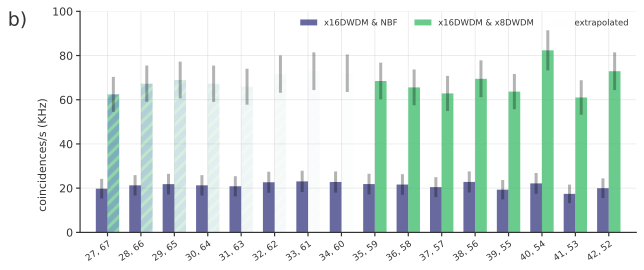

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
fill_diagonal_bar(ax, x8_diagonal, x16_diagonal, multiplier, multiplier_std, cmap)

In [24]:
# for use in the spdc spectrum extrapolation
export_main_diagonal = {"x8_diagonal": x8_diagonal, "x16_diagonal": x16_diagonal}
with open("export_main_diagonal.json", "w") as f:
    json.dump(export_main_diagonal, f)